In [334]:
#Packages setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Clicks setup
clicksDF = pd.read_csv('data/clicks.csv.gzip', compression='gzip', dtype={'advertiser_id':'int32','action_id':'float32','source_id':'int32','country_code':'category',\
                                                                           'latitude':'float32','longitude':'float32','carrier_id':'float32','os_minor':'category',\
                                                                           'os_major':'category','specs_brand':'category','timeToClick':'float32','touchX':'float32',\
                                                                        'touchY':'float32','ref_type':'category'}, index_col='trans_id')
clicksDF['created'] = pd.to_datetime(clicksDF['created'])


In [337]:
#Events setup
eventsDF = pd.read_csv('data/events.csv.gzip', compression='gzip', low_memory=False, dtype={'event_id':'int32','ref_type':'category','application_id':'int32',\
                                                                                            'attributed':'bool','device_countrycode':'category','device_city':'category',\
                                                                                            'trans_id':'category','carrier':'category','device_os':'category',\
                                                                                            'connection_type':'category'})
eventsDF['date'] = pd.to_datetime(eventsDF['date'])
eventsDF['wifi'].astype('bool', inplace=True)

0           True
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
2494393     True
2494394     True
2494395    False
2494396    False
2494397     True
2494398     True
2494399    False
2494400     True
2494401     True
2494402     True
2494403     True
2494404     True
2494405     True
2494406     True
2494407     True
2494408     True
2494409    False
2494410     True
2494411     True
2494412     True
2494413     True
2494414     True
2494415    False
2494416     True
2494417     True
2494418     True
2494419    False
2494420     Tr

In [354]:
#installs setup
installsDF = pd.read_csv('data/installs.csv.gzip', compression='gzip',index_col='ref_hash', dtype={'ref_type':'category','application_id':'int32',\
                                                                                              'device_brand':'category','click_hash':'float32'\
                                                                                            })
installsDF.drop(columns=['session_user_agent'], inplace=True)
installsDF['wifi'].astype('bool', inplace=True)
installsDF['created'] = pd.to_datetime(installsDF['created'])

In [345]:
#Auctions setup
auctionsDF = pd.read_csv('data/auctions.csv.gzip', compression='gzip', low_memory=False, dtype={'country':'category','platform':'category','ref_type_id':'category'})


In [ ]:
#Target setup

target_competenciaDF = pd.read_csv('data/target.csv', index_col='index',dtype={'index':'int32','obj_Sc':'int32','obj_St':'int32'})

In [ ]:
print('SETUP DONE')

Cuánto se tardó en instalar 
Cuánto afecta el WI-FI en las instalaciones
Perfiles de usuarios (plataforma, device_id, Brand, Carrier, lenguaje)
Cuánto tiempo promedio entre publicidades por perfil de usuario se convirtió, cuántos no. 
Cuántos usuarios tienen mas de una instalación (probabilidades)
Estadísitcas de advertisers en sus conversiones
Que día de semana hay mas conversiones, que hora del día
Probabilidad de un usuario nuevo haciendo una conversión
Probabilidad de un usuario frecuente haga otra conversión (mismo con clicks).


# CUANTO AFECTA EL WIFI EN LAS INSTALACIONES

In [101]:
#Dtypes check
installsDF.info

<bound method DataFrame.info of                                     created  application_id  \
ref_hash                                                      
8464844987297247076 2019-03-13 01:43:33.445               0   
3250564871270161533 2019-03-13 04:58:35.078               0   
7953318831018100268 2019-03-13 04:20:57.666               0   
7953318831018100268 2019-03-13 04:20:57.698               0   
8355110941557237501 2019-03-10 22:24:56.684               0   
8355110941557237501 2019-03-10 22:24:57.545               0   
4306303321567254439 2019-03-11 03:47:22.802               0   
1670430602051291592 2019-03-11 21:21:05.986               0   
1670430602051291592 2019-03-11 21:21:05.855               0   
5651666841804012468 2019-03-13 08:29:31.875               2   
4444460688493962577 2019-03-13 04:30:00.812               2   
8245291057117641959 2019-03-13 00:26:32.561               2   
5716316704073038128 2019-03-13 11:36:30.025               2   
6932545599757861975 201

In [94]:
installsDF['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [100]:
len(installsDF['wifi'])

3412

In [95]:
len(installsDF['wifi']) - sum(installsDF['wifi'].isnull())

1729

In [96]:
(sum(installsDF['wifi'].isnull()) / len(installsDF['wifi'])) * 100

49.32590855803048

In [97]:
installsDF['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [98]:
installsDF[installsDF['wifi'].isnull()]

,created,application_id,ref_type,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
ref_hash,,,,,,,,,,,,,,,,
8464844987297247076,2019-03-13 01:43:33.445,0,1891515180541284343,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
3250564871270161533,2019-03-13 04:58:35.078,0,1891515180541284343,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
7953318831018100268,2019-03-13 04:20:57.666,0,1891515180541284343,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543e+18,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
7953318831018100268,2019-03-13 04:20:57.698,0,1891515180541284343,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
8355110941557237501,2019-03-10 22:24:56.684,0,1891515180541284343,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876612e+18,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18
8355110941557237501,2019-03-10 22:24:57.545,0,1891515180541284343,NaN,False,False,6333597102633388268,1.083368711068078e+18,7.876612e+18,NaN,NaN,NaN,NaN,NaN,685400811232710215,NaN
4306303321567254439,2019-03-11 03:47:22.802,0,1891515180541284343,NaN,False,True,6333597102633388268,3.083058605577787e+17,9.179743e+18,NaN,b3f7905b-5058-4eca-853c-b3c670d7ac54,Open,NaN,NaN,7462893331703692427,4.073835e+18
1670430602051291592,2019-03-11 21:21:05.986,0,1891515180541284343,NaN,False,False,6333597102633388268,1.083368711068078e+18,7.551685e+17,NaN,NaN,NaN,NaN,NaN,5634136297886425939,NaN
1670430602051291592,2019-03-11 21:21:05.855,0,1891515180541284343,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.551685e+17,NaN,28a6e6a0-ba70-46a2-a63f-1e74b0dd5235,Open,NaN,NaN,5634136297886425939,3.301378e+18


In [99]:
sum(installsDF['wifi'] == True) 

1377

In [102]:
#Serie de wifi installs
wifiSs = installsDF['wifi']

In [103]:
wifiSs.value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [104]:
sum(wifiSs.isnull()) / len(wifiSs) * 100

49.32590855803048

SE TRABAJARÁ CONOCIENDO EL SESGO QUE GENERA 49.33% NULLS. Serán considerados sólo los datos no nulos.

In [ ]:
wifiSs.dropna(inplace = True)

In [ ]:
sum(wifiSs.isnull())

In [ ]:
#DESCRIPCIONES DE TODAS LAS CATEGORÍAS
json = pd.read_json('desc.json')

In [ ]:
#PROBANDO EL USO
json['clicks'].loc['action_id']

In [ ]:
#DE TODOS LOS INSTALLS QUE PROPORCIÓN UTILIZÓ WIFI ?
(sum(wifiSs == True)) / (len(wifiSs))

EL 79.64% DE LOS USUARIOS INSTALÓ UTILIZANDO WIFI

In [ ]:
#RELACIÓN ENTRE WIFI Y ATRIBUCIÓN A JAMMP DEL INSTALL ?

In [ ]:
#Falta información en la columna ?
sum(installsDF['attributed'].isnull())

In [105]:
#Porcentaje de no atribuciones a Jammp
print(sum(installsDF['attributed'] == False) / (len(installsDF['attributed']))*100)

100.0


CONCLUSIÓN: APUNTAR A USERS CONECTADOS A UNA RED WIFI

In [126]:
#Mismo para events
#DE TODOS LOS EVENTS QUE PROPORCIÓN UTILIZÓ WIFI ?
#SUMO LOS PROMEDIOS
#events_wifiSs = eventsDF['wifi']
events_with_wifi = (sum(eventsDF['wifi'] == True)) / (len(eventsDF['wifi'].dropna()))
events_with_wifi*100

67.51185026601453

In [122]:
#SESGO POR NULOS
sum(eventsDF['wifi'].isnull()) / len(eventsDF['wifi']) *100

44.721805403494116

In [123]:
#RELACIÓN ENTRE WIFI Y ATRIBUCIÓN A JAMMP DEL EVENT ?
#Falta información en la columna ?
sum(eventsDF['attributed'].isnull())

0

In [124]:
#Porcentaje de no atribuciones a Jammp en eventos
eventsDF['attributed'].value_counts()
(sum(eventsDF['attributed'] == False) )/ (len(eventsDF['attributed'])) *100

99.79558398876213

In [141]:
#Porcentaje de atribuciones a Jammp en eventos
eventsDF['attributed'].value_counts()
(sum(eventsDF['attributed'] == True) ) / (len(eventsDF['attributed'].dropna())) *100

0.20441601123786943

In [143]:
#Que probabilidad hay de que se genere un evento favorable a Jammp sabiendo que la persona estaba conectada a la red WIFI
EJ = (sum(eventsDF['attributed'] == True) )/ (len(eventsDF['attributed'].dropna())) 
events_with_wifi
noEJ = (sum(eventsDF['attributed'] == False) )/ (len(eventsDF['attributed'].dropna()))
#Teorema de bayes
'El porcentaje de eventos atribuídos a Jammp sabiendo que la persona estaba conectada a la red Wi-Fi es {}'\
.format( (EJ*events_with_wifi)*100 / ( (EJ*events_with_wifi) + (noEJ*events_with_wifi)))

'El porcentaje de eventos atribuídos a Jammp sabiendo que la persona estaba conectada a la red Wi-Fi es 0.2044160112378694'

In [134]:
EJ

0.002044160112378694

In [136]:
noEJ

0.9979558398876213

In [137]:
events_with_wifi

0.6751185026601454

In [ ]:
clicksDF.columns

In [ ]:
installsDF.columns

In [ ]:
eventsDF.columns

In [ ]:
target_competenciaDF.head()

In [ ]:
#clicksDF['action_id']
json['clicks'].loc['action_id']

In [ ]:
installsDF['attributed'].value_counts()

In [ ]:
installsDF.columns

In [ ]:
installsDF[installsDF['application_id'] == 7].sort_values(by = 'created')

In [ ]:
appAndModel = installsDF[['application_id', 'device_model']]
import matplotlib.pyplot as plt

In [ ]:
appAndModel['application_id'].value_counts().head(4).plot( kind = 'bar', title = 'Top 4 installs per Apps', grid = True, figsize = (15,5))
plt.xlabel('Applications')
plt.ylabel('Installs')

In [ ]:
#events by time of the day
eventsDF.sort_values(by ='date').iloc[240548]

In [ ]:
eventsDF.dtypes

In [ ]:
eventsDF['date'].describe() 

In [ ]:
#última posición en la columna
sum(eventsDF['date'] < '2019-03-05 23:59:59')

In [ ]:
eventsDF.sort_values(by ='date')[eventsDF['date'] < '2019-03-05 23:59:59' ] 

In [ ]:
#FILTRAR POR DÍAS PARA REDUCIR EL VOLUMEN DE DATOS Y QUE PROCESE MAS RÁPIDO (EL DF ES DE SOLO UNA SEMANA)

wednesdayAuctions = auctionsDF[auctionsDF['date'] <= '2019-03-05 23:59:59']

thursdayAuctions = auctionsDF[('2019-03-05 23:59:59' < auctionsDF['date']) & (auctionsDF['date'] <= '2019-04-05 23:59:59')]

In [ ]:
wednesdayauctions[wednesdayauctions['device_id'] == 633139769114048761]

In [ ]:
thursdayAuctions = auctionsDF[('2019-03-05 23:59:59' < auctionsDF['date']) & (auctionsDF['date'] <= '2019-04-05 23:59:59')]

In [3]:
#eventos de miercoles
wednesdayEvents = eventsDF[eventsDF['date'] <= '2019-03-05 23:59:59']

In [ ]:
#chequeo nulos
sum(wednesdayEvents['wifi'][wednesdayEvents['application_id'] == 66].isnull())

In [ ]:
#porcentaje de wifi's para la app que generó más events. (la 66)
sum(wednesdayEvents['wifi'][wednesdayEvents['application_id'] == 66]) / len(wednesdayEvents['wifi'][wednesdayEvents['application_id'] == 66]) * 100

In [ ]:
wednesdayEvents[(wednesdayEvents['wifi'] == True) & (wednesdayEvents['connection_type'] == 'Cellular' ) ]

In [ ]:
sum(wednesdayEvents['connection_type'] == 'Cellular')

In [ ]:
eventsDF.head()

In [4]:
list = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15','15-16', '16-17', '17-18', '18-19', '19-20', '20-21','21-22', '22-23', '23-24']
EventsByHour = pd.DataFrame(columns = ['Tuesday5','Wednesday6', 'Thursday7', 'Friday8', 'Saturday9', 'Sunday10', 'Monday11', 'Tuesday12', 'Wednesday13' ] ,index = list)


In [5]:
EventsByHour['Tuesday5'].iloc[0] = len(wednesdayEvents[('2019-03-05 00:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 01:00:00.000')])

In [6]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
EventsByHour['Tuesday5'].iloc[1] = len(wednesdayEvents[('2019-03-05 01:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 02:00:00.000')])

In [8]:
EventsByHour['Tuesday5'].iloc[2] = len(wednesdayEvents[ ('2019-03-05 02:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 03:00:00.000')])

In [9]:
EventsByHour['Tuesday5'].iloc[3] = len(wednesdayEvents[ ('2019-03-05 03:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 04:00:00.000')])

In [10]:
EventsByHour['Tuesday5'].iloc[4] = len(wednesdayEvents[ ('2019-03-05 04:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 05:00:00.000')])

In [11]:
EventsByHour['Tuesday5'].iloc[5] = len (wednesdayEvents[ ('2019-03-05 05:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 06:00:00.000')])

In [12]:
EventsByHour['Tuesday5'].iloc[6] = len (wednesdayEvents[ ('2019-03-05 06:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 07:00:00.000')])

In [13]:
EventsByHour['Tuesday5'].iloc[7] = len(wednesdayEvents[ ('2019-03-05 07:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 08:00:00.000')])

In [14]:
EventsByHour['Tuesday5'].iloc[8] = len(wednesdayEvents[ ('2019-03-05 08:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 09:00:00.000')])

In [15]:
EventsByHour['Tuesday5'].iloc[9] = len(wednesdayEvents[ ('2019-03-05 09:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 10:00:00.000')])

In [16]:
EventsByHour['Tuesday5'].iloc[10] = len(wednesdayEvents[ ('2019-03-05 10:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 11:00:00.000')])

In [17]:
EventsByHour['Tuesday5'].iloc[11] = len(wednesdayEvents[ ('2019-03-05 11:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 12:00:00.000')])

In [18]:
EventsByHour['Tuesday5'].iloc[12] = len(wednesdayEvents[ ('2019-03-05 12:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 13:00:00.000')])

In [19]:
EventsByHour['Tuesday5'].iloc[13] = len(wednesdayEvents[ ('2019-03-05 13:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 14:00:00.000')])

In [20]:
EventsByHour['Tuesday5'].iloc[14] = len(wednesdayEvents[ ('2019-03-05 14:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 15:00:00.000')])

In [21]:
EventsByHour['Tuesday5'].iloc[15] = len(wednesdayEvents[ ('2019-03-05 15:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 16:00:00.000')])

In [22]:
EventsByHour['Tuesday5'].iloc[16] = len(wednesdayEvents[ ('2019-03-05 16:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 17:00:00.000')])

In [23]:
EventsByHour['Tuesday5'].iloc[17] = len(wednesdayEvents[ ('2019-03-05 17:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 18:00:00.000')])

In [24]:
EventsByHour['Tuesday5'].iloc[18] = len(wednesdayEvents[ ('2019-03-05 18:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 19:00:00.000')])

In [25]:
EventsByHour['Tuesday5'].iloc[19] = len(wednesdayEvents[('2019-03-05 19:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 20:00:00.000')])

In [26]:
EventsByHour['Tuesday5'].iloc[20] = len(wednesdayEvents[('2019-03-05 20:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 21:00:00.000')])

In [27]:
EventsByHour['Tuesday5'].iloc[21] = len(wednesdayEvents[ ('2019-03-05 21:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 22:00:00.000')])

In [28]:
EventsByHour['Tuesday5'].iloc[22] = len(wednesdayEvents[ ('2019-03-05 22:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-05 23:00:00.000')])

In [29]:
EventsByHour['Tuesday5'].iloc[23] = len(wednesdayEvents[ ('2019-03-05 23:00:00.000'<= wednesdayEvents['date'])  & (wednesdayEvents['date'] < '2019-03-06 00:00:00.000')])

In [30]:
#defino y chequeo el thursday events
Wednesday6Events = eventsDF[('2019-03-06 00:00:00.000' <= eventsDF['date']) & (eventsDF['date'] <'2019-03-07 00:00:00.000')]

In [31]:
Wednesday6Events['date'].describe()

count                         253505
unique                        252975
top       2019-03-06 20:26:24.567000
freq                               2
first     2019-03-06 00:00:00.020000
last      2019-03-06 23:59:59.994000
Name: date, dtype: object

In [32]:
sum(Wednesday6Events['date'] < '2019-03-06 01:00:00.000')

18335

In [33]:
Wednesday6Events.shape

(253505, 22)

In [34]:
Wednesday6Events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
104,2019-03-06 16:55:55.806,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,02c80771-cb0d-4d82-aed3-202fb6755a34,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,6452955265823183819,4.077062e+17
105,2019-03-06 16:55:53.573,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,38e26afd-af07-4d8e-a056-3e66b78c97ca,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6452955265823183819,4.077062e+17
106,2019-03-06 16:56:08.955,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,093652f3-ca60-4a8f-bd3b-056e700d8d57,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6452955265823183819,4.077062e+17
107,2019-03-06 16:55:33.361,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,07833c28-8411-4c71-a7c5-7a6a4e5bfa1a,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6452955265823183819,4.077062e+17
108,2019-03-06 16:55:27.434,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,9614fe74-95c9-492e-bfae-b5617dc664d2,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,6452955265823183819,4.077062e+17


In [35]:
eventsDF['date'].describe()

count                        2494423
unique                       2488829
top       2019-03-12 14:36:58.017000
freq                               3
first     2019-03-05 00:00:00.255000
last      2019-03-13 23:59:59.984000
Name: date, dtype: object

In [36]:
eventsDF['date'] < '2019-03-06 00:00:00'

0           True
1           True
2           True
3           True
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2494393    False
2494394    False
2494395    False
2494396    False
2494397    False
2494398    False
2494399    False
2494400    False
2494401    False
2494402    False
2494403    False
2494404    False
2494405    False
2494406    False
2494407    False
2494408    False
2494409    False
2494410    False
2494411    False
2494412    False
2494413    False
2494414    False
2494415    False
2494416    False
2494417    False
2494418    False
2494419    False
2494420    Fal

In [37]:
EventsByHour.loc['00-01', 'Wednesday6'] = len(Wednesday6Events[('2019-03-06 00:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 01:00:00.000')])

In [38]:
EventsByHour.loc['01-02', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 01:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 02:00:00.000')])

In [39]:
EventsByHour.loc['02-03', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 02:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 03:00:00.000')])

In [40]:
EventsByHour.loc['03-04', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 03:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 04:00:00.000')])

In [41]:
EventsByHour.loc['04-05', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 04:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 05:00:00.000')])

In [42]:
EventsByHour.loc['05-06', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 05:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 06:00:00.000')])

In [43]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,18335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-02,15926,16372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-03,13818,13314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-04,12110,11104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-05,8225,7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-06,5437,5411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-07,3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-08,2571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-09,2196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-10,2536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
EventsByHour.loc['06-07', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 06:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 07:00:00.000')])

In [45]:
EventsByHour.loc['07-08', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 07:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 08:00:00.000')])

In [46]:
EventsByHour.loc['08-09', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 08:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 09:00:00.000')])

In [47]:
EventsByHour.loc['09-10', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 9:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 10:00:00.000')])

EventsByHour.loc['13-14', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 13:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-06 14:00:00.000')])

In [48]:
def func6(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-06 {}:00:00.000'.format(x)
    topLimit = '2019-03-06 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Wednesday6'] = len(Wednesday6Events[ (bottomLimit<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < topLimit)])

In [49]:
func6(0)
func6(1)
func6(2)
func6(3)
func6(4)
func6(5)
func6(6)
func6(7)
func6(8)
func6(9)
func6(10)
func6(11)
func6(12)
func6(13)
func6(14)
func6(15)
func6(16)
func6(17)
func6(18)
func6(19)
func6(20)
func6(21)
func6(22)
EventsByHour.loc['23-24', 'Wednesday6'] = len(Wednesday6Events[ ('2019-03-06 23:00:00.000'<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < '2019-03-07 00:00:00.000')])


In [50]:
#PROBANDO OTRA FUNCION 
def funcqueonda(x):
    while x < 24:
        y = x+1
        
        if x<10:
            x = '0{}'.format(x)
        if y < 10:
            y = '0{}'.format(y)
            
        bottomLimit = '2019-03-06 {}:00:00.000'.format(x)
        topLimit = '2019-03-06 {}:00:00.000'.format(y)
        EventsByHour.loc['{}-{}'.format(x,y), 'Wednesday6'] = len(Wednesday6Events[ (bottomLimit<= Wednesday6Events['date'])  & (Wednesday6Events['date'] < topLimit)])
        int(x)
        x= x+1
        
        

In [51]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,18335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-02,15926,16372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-03,13818,13314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-04,12110,11104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-05,8225,7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-06,5437,5411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-07,3333,3361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-08,2571,2485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-09,2196,2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-10,2536,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Defino y completo Thursday7 events
Thursday7Events = eventsDF[('2019-03-07 00:00:00.000' <= eventsDF['date']) & (eventsDF['date'] <='2019-03-08 00:00:00.000')]

def func7(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-07 {}:00:00.000'.format(x)
    topLimit = '2019-03-07 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Thursday7'] = len(Thursday7Events[ (bottomLimit<= Thursday7Events['date'])  & (Thursday7Events['date'] < topLimit)])

In [53]:
func7(0)
func7(1)
func7(2)
func7(3)
func7(4)
func7(5)
func7(6)
func7(7)
func7(8)
func7(9)
func7(10)
func7(11)
func7(12)
func7(13)
func7(14)
func7(15)
func7(16)
func7(17)
func7(18)
func7(19)
func7(20)
func7(21)
func7(22)
EventsByHour.loc['23-24', 'Thursday7'] = len(Thursday7Events[ ('2019-03-07 23:00:00.000'<= Thursday7Events['date'])  & (Thursday7Events['date'] < '2019-03-08 00:00:00.000')])

In [54]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,18335,18010,NaN,NaN,NaN,NaN,NaN,NaN
01-02,15926,16372,15233,NaN,NaN,NaN,NaN,NaN,NaN
02-03,13818,13314,14445,NaN,NaN,NaN,NaN,NaN,NaN
03-04,12110,11104,11240,NaN,NaN,NaN,NaN,NaN,NaN
04-05,8225,7995,6789,NaN,NaN,NaN,NaN,NaN,NaN
05-06,5437,5411,4128,NaN,NaN,NaN,NaN,NaN,NaN
06-07,3333,3361,2593,NaN,NaN,NaN,NaN,NaN,NaN
07-08,2571,2485,1800,NaN,NaN,NaN,NaN,NaN,NaN
08-09,2196,2178,2566,NaN,NaN,NaN,NaN,NaN,NaN
09-10,2536,3302,3240,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#defino y completo Friday8
Friday8Events = eventsDF[('2019-03-08 00:00:00.000' <= eventsDF['date']) & (eventsDF['date'] <='2019-03-09 00:00:00.000')]

def func8(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-08 {}:00:00.000'.format(x)
    topLimit = '2019-03-08 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Friday8'] = len(Friday8Events[ (bottomLimit<= Friday8Events['date'])  & (Friday8Events['date'] < topLimit)])

In [56]:
func8(0)
func8(1)
func8(2)
func8(3)
func8(4)
func8(5)
func8(6)
func8(7)
func8(8)
func8(9)
func8(10)
func8(11)
func8(12)
func8(13)
func8(14)
func8(15)
func8(16)
func8(17)
func8(18)
func8(19)
func8(20)
func8(21)
func8(22)
EventsByHour.loc['23-24', 'Friday8'] = len(Friday8Events[ ('2019-03-08 23:00:00.000'<= Friday8Events['date'])  & (Friday8Events['date'] < '2019-03-09 00:00:00.000')])


In [57]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,18335,18010,27825,NaN,NaN,NaN,NaN,NaN
01-02,15926,16372,15233,20142,NaN,NaN,NaN,NaN,NaN
02-03,13818,13314,14445,16088,NaN,NaN,NaN,NaN,NaN
03-04,12110,11104,11240,11611,NaN,NaN,NaN,NaN,NaN
04-05,8225,7995,6789,6286,NaN,NaN,NaN,NaN,NaN
05-06,5437,5411,4128,4547,NaN,NaN,NaN,NaN,NaN
06-07,3333,3361,2593,2945,NaN,NaN,NaN,NaN,NaN
07-08,2571,2485,1800,2230,NaN,NaN,NaN,NaN,NaN
08-09,2196,2178,2566,2106,NaN,NaN,NaN,NaN,NaN
09-10,2536,3302,3240,3398,NaN,NaN,NaN,NaN,NaN


In [58]:
Saturday9Events = eventsDF[('2019-03-09 00:00:00.000' <= eventsDF['date']) & (eventsDF['date'] <='2019-03-10 00:00:00.000')]

def func9(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-09 {}:00:00.000'.format(x)
    topLimit = '2019-03-09 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Saturday9'] = len(Saturday9Events[ (bottomLimit<= Saturday9Events['date'])  & (Saturday9Events['date'] < topLimit)])

In [59]:
func9(0)
func9(1)
func9(2)
func9(3)
func9(4)
func9(5)
func9(6)
func9(7)
func9(8)
func9(9)
func9(10)
func9(11)
func9(12)
func9(13)
func9(14)
func9(15)
func9(16)
func9(17)
func9(18)
func9(19)
func9(20)
func9(21)
func9(22)
EventsByHour.loc['23-24', 'Saturday9'] = len(Saturday9Events[ ('2019-03-09 23:00:00.000'<= Saturday9Events['date'])  & (Saturday9Events['date'] < '2019-03-10 00:00:00.000')])


In [60]:
Saturday9Events['date'].describe()

count                         286221
unique                        285598
top       2019-03-09 00:12:42.354000
freq                               3
first     2019-03-09 00:00:00.093000
last      2019-03-09 23:59:59.434000
Name: date, dtype: object

In [61]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,18335,18010,27825,21582,NaN,NaN,NaN,NaN
01-02,15926,16372,15233,20142,18546,NaN,NaN,NaN,NaN
02-03,13818,13314,14445,16088,15396,NaN,NaN,NaN,NaN
03-04,12110,11104,11240,11611,12692,NaN,NaN,NaN,NaN
04-05,8225,7995,6789,6286,9531,NaN,NaN,NaN,NaN
05-06,5437,5411,4128,4547,6824,NaN,NaN,NaN,NaN
06-07,3333,3361,2593,2945,4067,NaN,NaN,NaN,NaN
07-08,2571,2485,1800,2230,3437,NaN,NaN,NaN,NaN
08-09,2196,2178,2566,2106,3864,NaN,NaN,NaN,NaN
09-10,2536,3302,3240,3398,4232,NaN,NaN,NaN,NaN


In [62]:
len(Saturday9Events[ ('2019-03-09 00:00:00.000'<= Saturday9Events['date'])  & (Saturday9Events['date'] < '2019-03-09 01:00:00.000')])


21582

In [63]:
Sunday10Events = eventsDF[('2019-03-10 00:00:00.000' <= eventsDF['date']) & (eventsDF['date'] <='2019-03-11 00:00:00.000')]

def func10(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-10 {}:00:00.000'.format(x)
    topLimit = '2019-03-10 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Sunday10'] = len(Sunday10Events[(bottomLimit<= Sunday10Events['date'])  & (Sunday10Events['date'] < topLimit)])


In [64]:
func10(0)
func10(1)
func10(2)
func10(3)
func10(4)
func10(5)
func10(6)
func10(7)
func10(8)
func10(9)
func10(10)
func10(11)
func10(12)
func10(13)
func10(14)
func10(15)
func10(16)
func10(17)
func10(18)
func10(19)
func10(20)
func10(21)
func10(22)
EventsByHour.loc['23-24', 'Sunday10'] = len(Sunday10Events[ ('2019-03-10 23:00:00.000'<= Sunday10Events['date'])  & (Sunday10Events['date'] < '2019-03-11 00:00:00.000')])

In [65]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,18335,18010,27825,21582,22008,NaN,NaN,NaN
01-02,15926,16372,15233,20142,18546,18819,NaN,NaN,NaN
02-03,13818,13314,14445,16088,15396,16854,NaN,NaN,NaN
03-04,12110,11104,11240,11611,12692,12929,NaN,NaN,NaN
04-05,8225,7995,6789,6286,9531,10394,NaN,NaN,NaN
05-06,5437,5411,4128,4547,6824,8166,NaN,NaN,NaN
06-07,3333,3361,2593,2945,4067,6868,NaN,NaN,NaN
07-08,2571,2485,1800,2230,3437,4674,NaN,NaN,NaN
08-09,2196,2178,2566,2106,3864,4129,NaN,NaN,NaN
09-10,2536,3302,3240,3398,4232,3889,NaN,NaN,NaN


In [66]:
Monday11Events = eventsDF[('2019-03-11 00:00:00.000' <= eventsDF['date']) & (eventsDF['date'] <='2019-03-12 00:00:00.000')]

def func11(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-11 {}:00:00.000'.format(x)
    topLimit = '2019-03-11 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Monday11'] = len(Monday11Events[(bottomLimit<= Monday11Events['date'])  & (Monday11Events['date'] < topLimit)])
    
    
func11(0)
func11(1)
func11(2)
func11(3)
func11(4)
func11(5)
func11(6)
func11(7)
func11(8)
func11(9)
func11(10)
func11(11)
func11(12)
func11(13)
func11(14)
func11(15)
func11(16)
func11(17)
func11(18)
func11(19)
func11(20)
func11(21)
func11(22)
EventsByHour.loc['23-24', 'Monday11'] = len(Monday11Events[ ('2019-03-11 23:00:00.000'<= Monday11Events['date'])  & (Monday11Events['date'] < '2019-03-12 00:00:00.000')])

In [67]:
Tuesday12Events = eventsDF[('2019-03-12 00:00:00.000' <= eventsDF['date']) & (eventsDF['date'] <='2019-03-13 00:00:00.000')]

def func12(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-12 {}:00:00.000'.format(x)
    topLimit = '2019-03-12 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Tuesday12'] = len(Tuesday12Events[(bottomLimit<= Tuesday12Events['date'])  & (Tuesday12Events['date'] < topLimit)])
    
    
func12(0)
func12(1)
func12(2)
func12(3)
func12(4)
func12(5)
func12(6)
func12(7)
func12(8)
func12(9)
func12(10)
func12(11)
func12(12)
func12(13)
func12(14)
func12(15)
func12(16)
func12(17)
func12(18)
func12(19)
func12(20)
func12(21)
func12(22)
EventsByHour.loc['23-24', 'Tuesday12'] = len(Tuesday12Events[('2019-03-12 23:00:00.000'<= Tuesday12Events['date'])  & (Tuesday12Events['date'] < '2019-03-13 00:00:00.000')])

In [68]:
Wednesday13Events = eventsDF[('2019-03-13 00:00:00.000' <= eventsDF['date'])]

def func13(x):
    y = x+1
    if x<10:
        x = '0{}'.format(x)
    if y < 10:
        y = '0{}'.format(y)    
    
    bottomLimit = '2019-03-13 {}:00:00.000'.format(x)
    topLimit = '2019-03-13 {}:00:00.000'.format(y)
    EventsByHour.loc['{}-{}'.format(x,y), 'Wednesday13'] = len(Wednesday13Events[(bottomLimit<= Wednesday13Events['date'])  & (Wednesday13Events['date'] < topLimit)])
    
    
func13(0)
func13(1)
func13(2)
func13(3)
func13(4)
func13(5)
func13(6)
func13(7)
func13(8)
func13(9)
func13(10)
func13(11)
func13(12)
func13(13)
func13(14)
func13(15)
func13(16)
func13(17)
func13(18)
func13(19)
func13(20)
func13(21)
func13(22)
EventsByHour.loc['23-24', 'Wednesday13'] = len(Wednesday13Events['2019-03-13 23:00:00.000'<= Wednesday13Events['date']])

In [69]:
EventsByHour

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
00-01,17154,18335,18010,27825,21582,22008,18805,17861,19492
01-02,15926,16372,15233,20142,18546,18819,17971,17897,18382
02-03,13818,13314,14445,16088,15396,16854,14027,14614,15335
03-04,12110,11104,11240,11611,12692,12929,10187,9793,10803
04-05,8225,7995,6789,6286,9531,10394,7767,5964,6076
05-06,5437,5411,4128,4547,6824,8166,4058,3780,4610
06-07,3333,3361,2593,2945,4067,6868,3548,2509,3071
07-08,2571,2485,1800,2230,3437,4674,2836,1609,1981
08-09,2196,2178,2566,2106,3864,4129,2780,1905,2352
09-10,2536,3302,3240,3398,4232,3889,3866,3685,4751


In [70]:
EventsByHour.describe().round()

,Tuesday5,Wednesday6,Thursday7,Friday8,Saturday9,Sunday10,Monday11,Tuesday12,Wednesday13
count,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
mean,10023.0,10563.0,10571.0,11897.0,11926.0,12212.0,11204.0,12361.0,13178.0
std,5140.0,4840.0,5403.0,6573.0,5598.0,5658.0,5225.0,6392.0,6248.0
min,2196.0,2178.0,1800.0,2106.0,3437.0,3889.0,2780.0,1609.0,1981.0
25%,5337.0,7282.0,6361.0,6101.0,6867.0,7477.0,7549.0,6850.0,9621.0
50%,11333.0,11876.0,11490.0,12691.0,13441.0,12967.0,11747.0,13805.0,15097.0
75%,13850.0,14218.0,14436.0,15733.0,16043.0,16405.0,15302.0,17140.0,17090.0
max,18123.0,18335.0,21370.0,27825.0,21582.0,22008.0,18805.0,21488.0,22132.0


NameError: name 'EventsByHour' is not defined

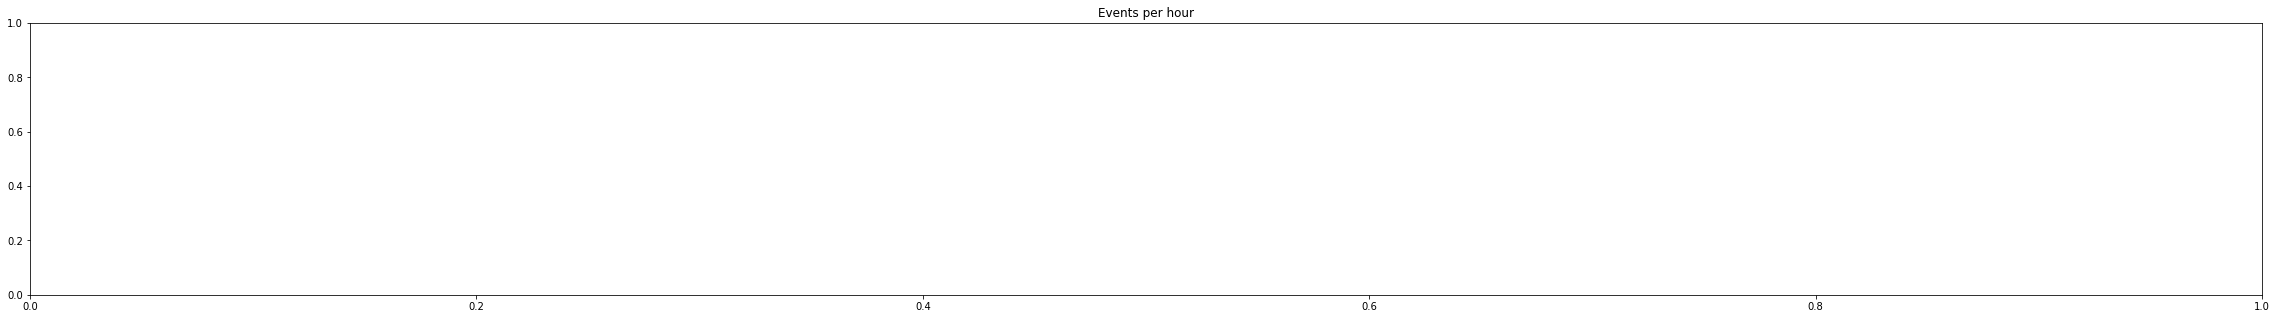

In [9]:
plt.figure(figsize = (40,5))
plt.title('Events per hour')
xticks1 = EventsByHour.index
sns.heatmap(EventsByHour.T, square = True, linewidth=1, cmap = 'Blues', xticklabels=xticks1)
plt.xticks(rotation = 0)
plt.xlabel('Time')
plt.ylabel('Day', rotation=0)

In [144]:
EventsByHour.max()

Tuesday5       18123
Wednesday6     18335
Thursday7      21370
Friday8        27825
Saturday9      21582
Sunday10       22008
Monday11       18805
Tuesday12      21488
Wednesday13    22132
dtype: int64

In [175]:
EventsByHour.index

Index(['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08',
       '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16',
       '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
      dtype='object')

In [6]:
installsDF['hora'] = installsDF['created'].apply(lambda x: ('%02d:00-%02d:59' % (x.hour, x.hour)))
installsDF['dia'] = installsDF['created'].apply(lambda x: x.day_name()+' '+str(x.day))
pivot_installs = installsDF.groupby(['dia','hora']).size().reset_index()
pivot_installs.columns = ['dia','hora', 'count']
pivot_installs = pivot_installs.pivot_table(index='hora', columns='dia', values='count',aggfunc='sum', fill_value=0, dropna=False)
pivot_installs = pivot_installs[['Tuesday 5', 'Wednesday 6', 'Thursday 7', 'Friday 8', 'Saturday 9', 'Sunday 10', 'Monday 11', 'Tuesday 12', 'Wednesday 13']]
display(pivot_installs)


dia,Tuesday 5,Wednesday 6,Thursday 7,Friday 8,Saturday 9,Sunday 10,Monday 11,Tuesday 12,Wednesday 13
hora,,,,,,,,,
00:00-00:59,22,16,24,33,17,23,17,20,26
01:00-01:59,21,15,20,14,25,18,28,21,29
02:00-02:59,14,15,16,12,19,26,28,24,20
03:00-03:59,11,14,16,13,14,12,9,11,15
04:00-04:59,2,9,8,6,10,3,15,11,12
05:00-05:59,3,3,5,3,5,4,3,6,6
06:00-06:59,3,0,1,2,5,4,1,2,0
07:00-07:59,1,1,1,3,4,2,0,7,2
08:00-08:59,4,1,2,4,4,5,2,3,3


Text(1399.8,0.5,'Day')

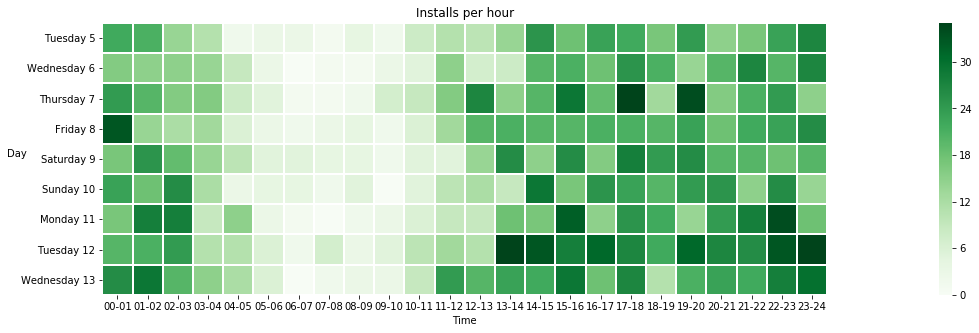

In [12]:
list = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15','15-16', '16-17', '17-18', '18-19', '19-20', '20-21','21-22', '22-23', '23-24']
plt.figure(figsize = (40,5))
plt.title('Installs per hour')
xticks2 = list 
sns.heatmap(pivot_installs.T, square = True, linewidth=1, cmap = 'Greens', xticklabels=xticks2)
plt.xticks(rotation = 0)
plt.xlabel('Time')
plt.ylabel('Day', rotation=0)

In [15]:
auctionsDF['date'] = pd.to_datetime(auctionsDF['date'])
auctionsDF['hora'] = auctionsDF['date'].apply(lambda x: ('%02d-%02d' % (x.hour, (x.hour+1))))
auctionsDF['dia'] = auctionsDF['date'].apply(lambda x: x.day_name()+' '+str(x.day))
pivot_auctions = auctionsDF.groupby(['dia','hora']).size().reset_index()
pivot_auctions.columns = ['dia','hora', 'count']
pivot_auctions = pivot_auctions.pivot_table(index='hora', columns='dia', values='count',aggfunc='sum', fill_value=0, dropna=False)
pivot_auctions = pivot_auctions[['Tuesday 5', 'Wednesday 6', 'Thursday 7', 'Friday 8', 'Saturday 9', 'Sunday 10', 'Monday 11', 'Tuesday 12', 'Wednesday 13']]
display(pivot_auctions)

dia,Tuesday 5,Wednesday 6,Thursday 7,Friday 8,Saturday 9,Sunday 10,Monday 11,Tuesday 12,Wednesday 13
hora,,,,,,,,,
00-01,14859,34045,33714,147676,159540,31450,203789,171154,209489
01-02,174893,121530,73944,179568,154556,75458,197885,181448,211809
02-03,155339,144125,117576,132846,137265,167307,185756,163076,185174
03-04,108498,105575,105663,96914,100093,143698,121824,117486,127790
04-05,74230,79694,69720,66466,72865,110476,87889,74506,80348
05-06,52970,49859,48781,44932,52740,81757,60412,47969,47823
06-07,38836,32616,30441,28167,35537,55342,39265,33164,32362
07-08,29149,22241,23366,21769,30032,38241,28928,26793,24590
08-09,25668,19658,25644,22414,29218,34129,29559,31447,30178


Text(1399.8,0.5,'Day')

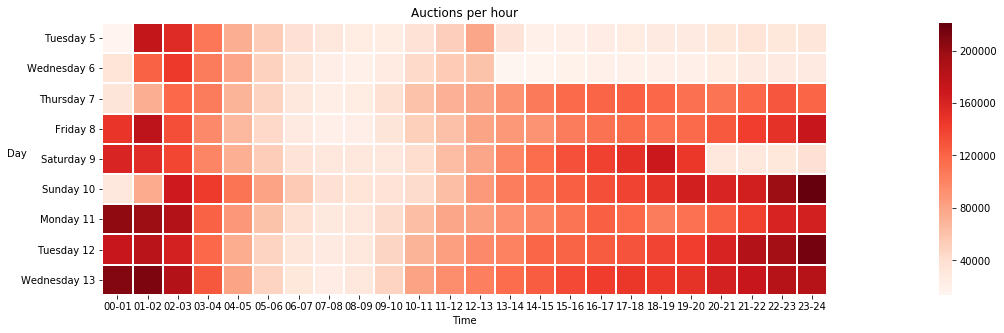

In [17]:
plt.figure(figsize = (40,5))
plt.title('Auctions per hour')
xticks3 = list 
sns.heatmap(pivot_auctions.T, square = True, linewidth=1, cmap = 'Reds', xticklabels=xticks3)
plt.xticks(rotation = 0)
plt.xlabel('Time')
plt.ylabel('Day', rotation=0)

In [27]:
auctionsDF.head(2)
Tuesday6Auctions = auctionsDF[auctionsDF['date'] < '2019-03-06 00:00:00.000000'].drop(columns = 'auction_type_id', axis = 1)

In [39]:
Tuesday6Auctions['hora'].value_counts().sort_values(ascending = False)

01-02    174893
02-03    155339
03-04    108498
12-13     79078
04-05     74230
05-06     52970
11-12     51993
06-07     38836
10-11     38014
13-14     35520
21-22     34112
23-24     33081
20-21     32064
22-23     32031
07-08     29149
18-19     27850
19-20     27216
08-09     25668
17-18     25590
09-10     25213
16-17     24486
15-16     21520
14-15     20191
00-01     14859
Name: hora, dtype: int64

Text(0,0.5,'Number of auctions')

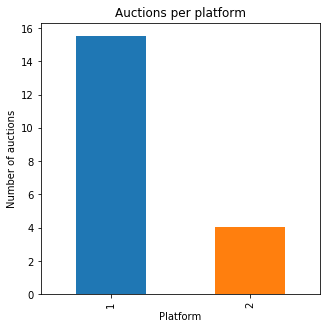

In [67]:
plt.figure(figsize = (5,5))
plt.title('Auctions per platform')
plt.xticks(rotation = 0)
(auctionsDF['platform'].value_counts()/1000000).plot(kind = 'bar')

plt.xlabel('Platform')
plt.ylabel('Number of auctions')


In [66]:
auctionsDF['platform'].value_counts()/1000000

1    15.541825
2     4.029494
Name: platform, dtype: float64

In [139]:
plat1 = auctionsDF.groupby(['platform','dia']).size().reset_index()
plat1.columns = ['platform','dia', 'auctions']
pivot_plat1 = plat1.pivot_table(index='dia', columns='platform', values='auctions',aggfunc='sum', fill_value=0, dropna=False)
#pivot_plat1 = pivot_plat1[['Tuesday 5', 'Wednesday 6', 'Thursday 7', 'Friday 8', 'Saturday 9', 'Sunday 10', 'Monday 11', 'Tuesday 12', 'Wednesday 13']]
#display(pivot_auctions)

In [163]:
pivot_plat1#.loc['Wednesday 6']

platform,1,2
dia,,
Friday 8,1898054,404948
Monday 11,2165005,409911
Saturday 9,1618742,455810
Sunday 10,2149876,487658
Thursday 7,1617609,430052
Tuesday 12,2337162,442748
Tuesday 5,719286,463115
Wednesday 13,2456467,481906
Wednesday 6,579624,453346


In [217]:
finalPlat = pd.DataFrame(index =['Tuesday 5', 'Wednesday 6', 'Thursday 7', 'Friday 8', 'Saturday 9', 'Sunday 10', 'Monday 11', 'Tuesday 12', 'Wednesday 13'], columns = [1,2])

In [218]:
finalPlat

,1,2
Tuesday 5,NaN,NaN
Wednesday 6,NaN,NaN
Thursday 7,NaN,NaN
Friday 8,NaN,NaN
Saturday 9,NaN,NaN
Sunday 10,NaN,NaN
Monday 11,NaN,NaN
Tuesday 12,NaN,NaN
Wednesday 13,NaN,NaN


In [221]:
finalPlat.loc['Tuesday 5'][1] =  pivot_plat1.loc['Tuesday 5'][0]

In [223]:
def func(x,y,z):
    finalPlat.loc['{}'.format(str(z))][x+1] =  pivot_plat1.loc['{}'.format(str(z))][x]
    finalPlat.loc['{}'.format(z)][y+1] =  pivot_plat1.loc['{}'.format(z)][y]

In [231]:
func(0,1,'Tuesday 5')
func(0,1,'Wednesday 6')
func(0,1,'Thursday 7')
func(0,1,'Friday 8')
func(0,1,'Saturday 9')
func(0,1,'Sunday 10')
func(0,1,'Monday 11')
func(0,1,'Tuesday 12')
func(0,1,'Wednesday 13')

In [232]:
finalPlat

,1,2
Tuesday 5,719286,463115
Wednesday 6,579624,453346
Thursday 7,1617609,430052
Friday 8,1898054,404948
Saturday 9,1618742,455810
Sunday 10,2149876,487658
Monday 11,2165005,409911
Tuesday 12,2337162,442748
Wednesday 13,2456467,481906


Text(0,0.5,'Days')

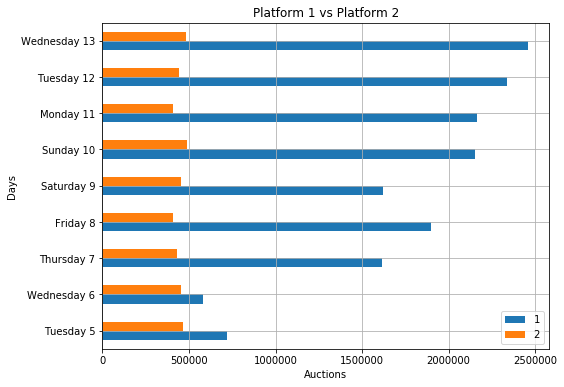

In [261]:
finalPlat.plot(kind = 'barh', figsize = (8,6), grid = True)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Auctions')
plt.title('Platform 1 vs Platform 2')
plt.ylabel('Days')

In [258]:
auctionsDF['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [271]:
sum(auctionsDF['platform'] == '1') / (sum(auctionsDF['platform'] == '1') + sum(auctionsDF['platform'] == '2'))

0.7941122925848789

In [274]:
auctionsDF['platform'].describe()

count     19571319
unique           2
top              1
freq      15541825
Name: platform, dtype: object

In [306]:
installsDF[installsDF['wifi'] == True]['application_id'].value_counts()

9     498
10    372
16    280
2     164
15     20
28     15
24     11
14     10
21      5
23      1
4       1
Name: application_id, dtype: int64

Text(0,0.5,'Installs')

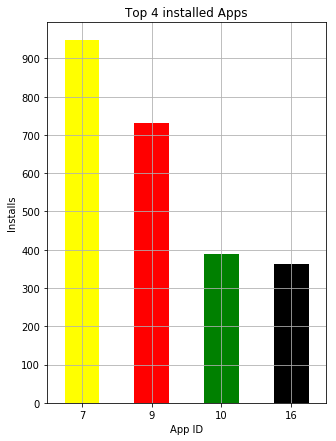

In [322]:
installsDF['application_id'].value_counts().sort_values(ascending = False).head(4).plot(kind = 'bar', grid = True, figsize = (5,7), color=['yellow', 'red', 'green', 'black'])
plt.xticks(rotation = 0)
plt.title('Top 4 installed Apps')
plt.xlabel('App ID')
yticks = range(0,1000,100)
plt.yticks(yticks)
plt.ylabel('Installs')

Text(0,0.5,'App ID')

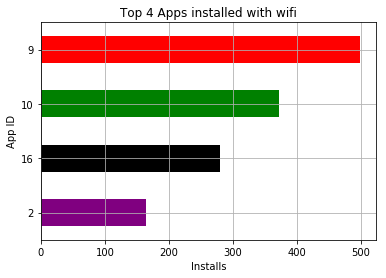

In [328]:
installsDF[installsDF['wifi'] == True]['application_id'].value_counts().head(4).sort_values(ascending = True).plot(kind = 'barh',  color=['purple', 'black', 'green', 'red'], grid = True)
plt.title('Top 4 Apps installed with wifi')
plt.xlabel('Installs')
plt.ylabel('App ID')

In [350]:
auctionsDF.columns

Index(['auction_type_id', 'country', 'date', 'device_id', 'platform',
       'ref_type_id', 'source_id'],
      dtype='object')

In [351]:
clicksDF.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'os_minor',
       'agent_device', 'os_major', 'specs_brand', 'brand', 'timeToClick',
       'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [352]:
eventsDF.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [355]:
installsDF.columns

Index(['created', 'application_id', 'ref_type', 'click_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'user_agent', 'event_uuid', 'kind', 'wifi', 'trans_id', 'ip_address',
       'device_language'],
      dtype='object')

In [346]:
auctionsDF.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [348]:
eventsDF.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')